# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

# Accessing Data

In [ ]:
anemia_path = '/kaggle/input/eyeanemia/Anemia (95)'
non_anemia_path = '/kaggle/input/eyeanemia/Non Anemia (123)'

In [ ]:
anemia_image_paths = [os.path.join(anemia_path, filename) for filename in tqdm(os.listdir(anemia_path))]
anemia_labels = [1] * len(anemia_image_paths)

  0%|          | 0/95 [00:00<?, ?it/s]

In [ ]:
non_anemia_image_paths = [os.path.join(non_anemia_path, filename) for filename in tqdm(os.listdir(non_anemia_path))]
non_anemia_labels = [0] * len(non_anemia_image_paths)

  0%|          | 0/123 [00:00<?, ?it/s]

In [ ]:
image_paths = anemia_image_paths + non_anemia_image_paths
labels = anemia_labels + non_anemia_labels

In [ ]:
#Creating Dataframe
df = pd.DataFrame({"Image": image_paths, "Label": labels})

In [ ]:
df

,Image,Label
0,/kaggle/input/eyeanemia/Anemia (95)/0-anemia5.jpg,1
1,/kaggle/input/eyeanemia/Anemia (95)/0-anemia10...,1
2,/kaggle/input/eyeanemia/Anemia (95)/0-anemia93...,1
3,/kaggle/input/eyeanemia/Anemia (95)/anemia38.jpg,1
4,/kaggle/input/eyeanemia/Anemia (95)/0-anemia14...,1
...,...,...
213,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0
214,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0
215,/kaggle/input/eyeanemia/Non Anemia (123)/nonan...,0
216,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0


In [ ]:
#shuffling dataframe
df = shuffle(df).reset_index(drop = True)
df

,Image,Label
0,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0
1,/kaggle/input/eyeanemia/Anemia (95)/anemia44.jpg,1
2,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0
3,/kaggle/input/eyeanemia/Anemia (95)/0-anemia27...,1
4,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0
...,...,...
213,/kaggle/input/eyeanemia/Anemia (95)/anemia18.jpg,1
214,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0
215,/kaggle/input/eyeanemia/Non Anemia (123)/0-non...,0
216,/kaggle/input/eyeanemia/Anemia (95)/anemia2.jpg,1


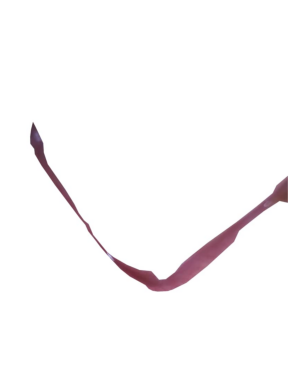

In [ ]:
#Displaying 1st image in Image column
img = Image.open(df['Image'][1])
plt.axis('off')
plt.imshow(img);

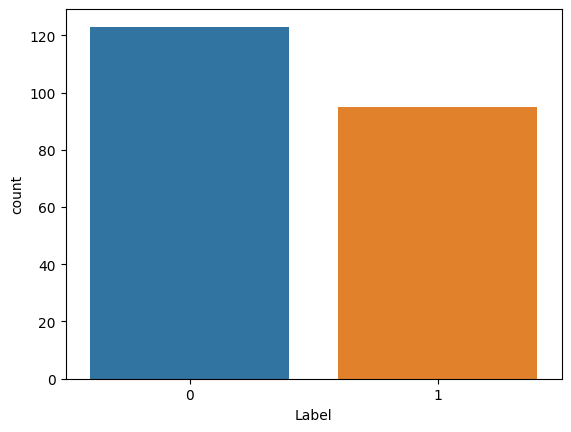

In [ ]:
sns.countplot(x= 'Label',data=df);

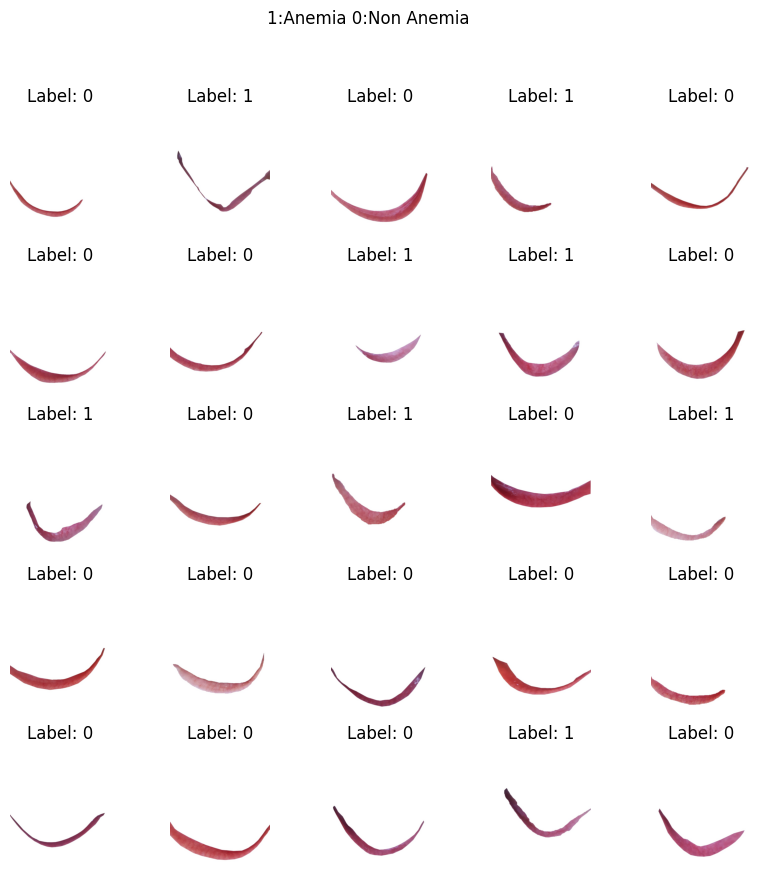

In [ ]:
#Displaying 1st 25 images with its label
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    img = Image.open(df['Image'][i])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df['Label'][i]}")
plt.suptitle("1:Anemia 0:Non Anemia")
plt.show()

In [ ]:
#Defining a function to extract features in an image
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((224,224), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),224,224,3)
    return features

In [ ]:
#Splitting the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
x= extract_features(train_df['Image'])

  0%|          | 0/174 [00:00<?, ?it/s]

In [ ]:
#normalization on the pixel values of the images
x = x/255.0

In [ ]:
y = np.array(train_df['Label'])

# Model Building

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

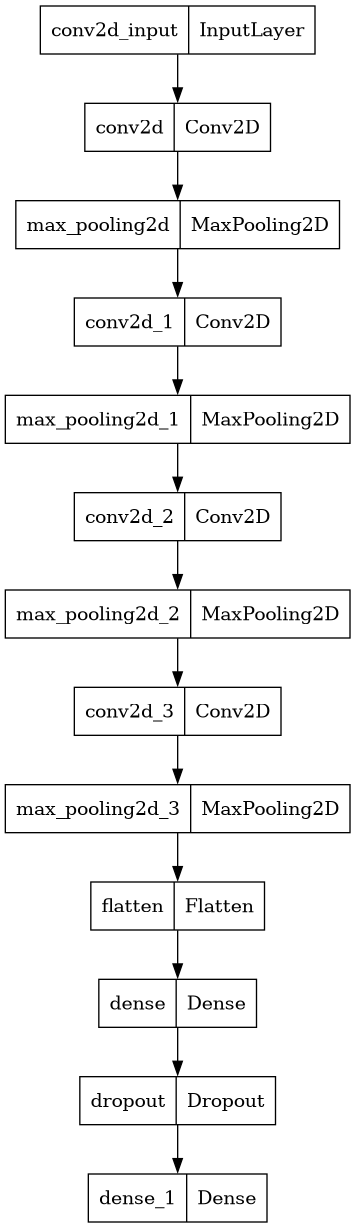

In [ ]:
plot_model(model)

In [ ]:
#Training the model
history = model.fit(x=x, y=y,batch_size = 32,epochs = 40, validation_split = 0.2)

Epoch 1/40
5/5 [==============================] - 10s 2s/step - loss: 0.6998 - accuracy: 0.5252 - val_loss: 0.6913 - val_accuracy: 0.5143
Epoch 2/40
5/5 [==============================] - 9s 2s/step - loss: 0.6885 - accuracy: 0.5396 - val_loss: 0.6823 - val_accuracy: 0.5429
Epoch 3/40
5/5 [==============================] - 9s 2s/step - loss: 0.6984 - accuracy: 0.5755 - val_loss: 0.6706 - val_accuracy: 0.5714
Epoch 4/40
5/5 [==============================] - 9s 2s/step - loss: 0.6241 - accuracy: 0.6331 - val_loss: 0.6725 - val_accuracy: 0.7714
Epoch 5/40
5/5 [==============================] - 10s 2s/step - loss: 0.6389 - accuracy: 0.6259 - val_loss: 0.6066 - val_accuracy: 0.6000
Epoch 6/40
5/5 [==============================] - 9s 2s/step - loss: 0.5447 - accuracy: 0.7122 - val_loss: 0.6062 - val_accuracy: 0.6571
Epoch 7/40
5/5 [==============================] - 9s 2s/step - loss: 0.4929 - accuracy: 0.7338 - val_loss: 0.5187 - val_accuracy: 0.7143
Epoch 8/40
5/5 [=======================

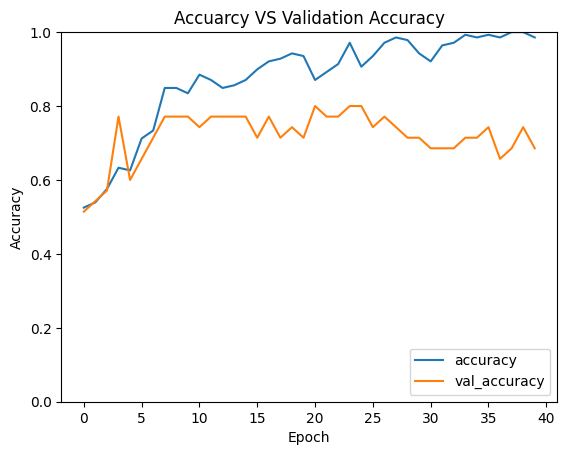

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Accuarcy VS Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

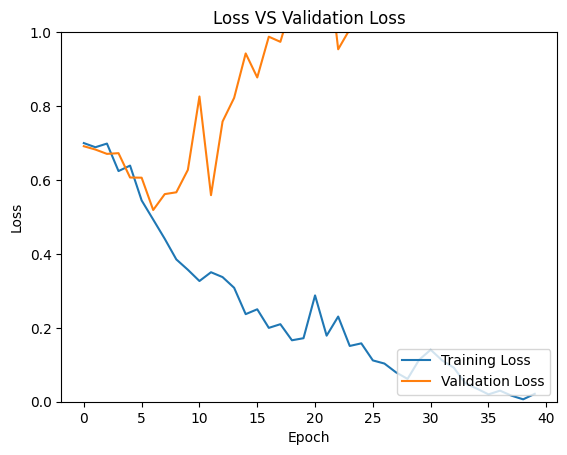

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Loss VS Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Testing the model/Predicting

  0%|          | 0/44 [00:00<?, ?it/s]

2/2 [==============================] - 1s 211ms/step


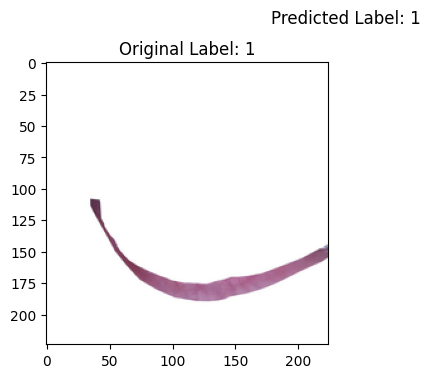

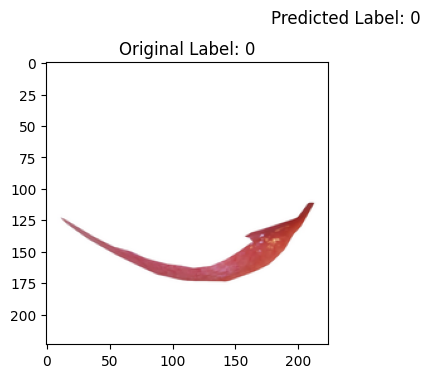

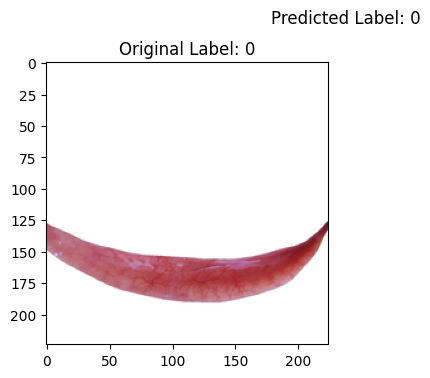

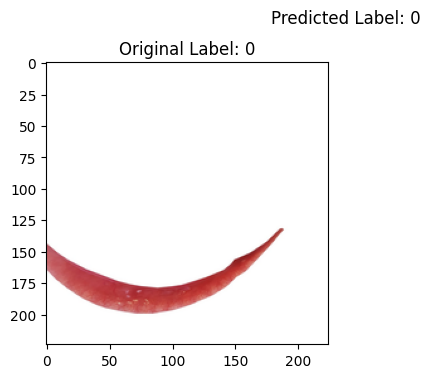

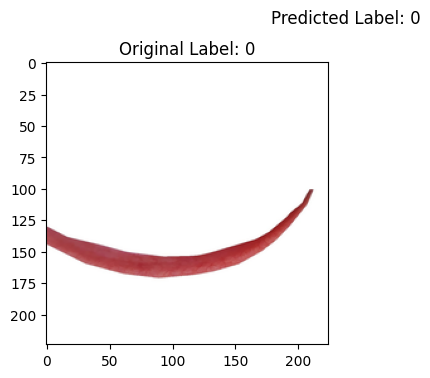

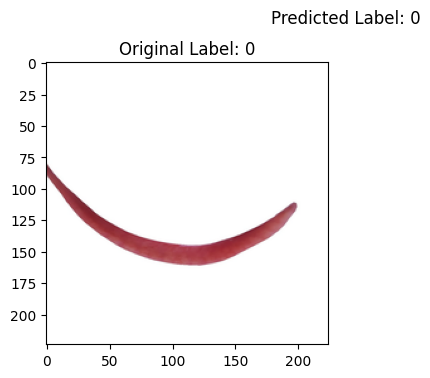

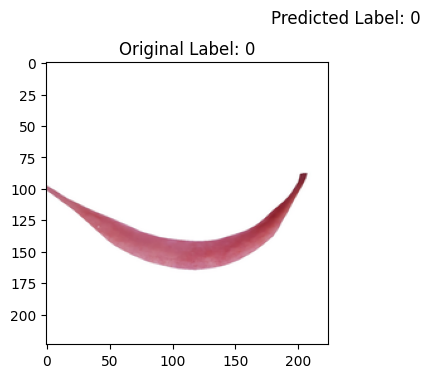

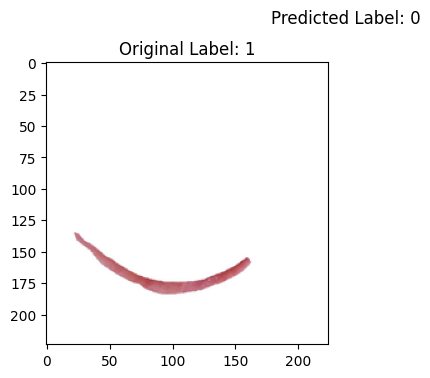

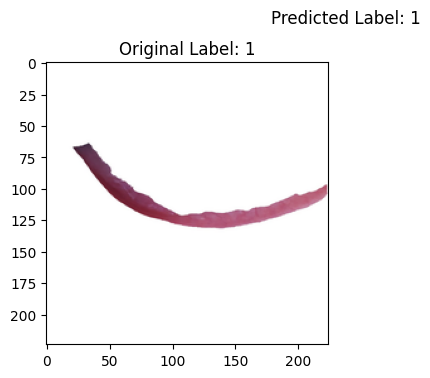

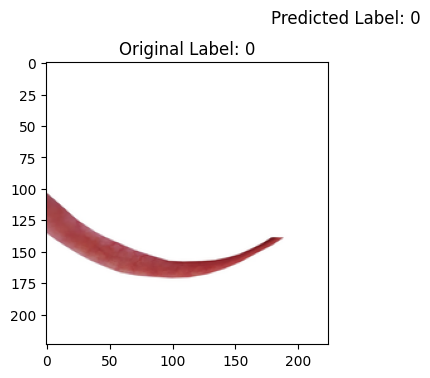

In [ ]:
x_test = extract_features(test_df['Image'])
x_test = x_test / 255.0
y_test = np.array(test_df['Label'])

# Making predictions on the test set
predictions = model.predict(x_test)

# Display a few images along with original and predicted labels
num_images_to_display = 10

for i in range(num_images_to_display):
    # Display original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i])
    plt.title(f"Original Label: {y_test[i]}")
    plt.suptitle(f"Predicted Label: {round(predictions[i][0])}")
    plt.show()

In [ ]:
#Saving the dataset
model.save("anemia_detection_model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
